<div><center><img src="iscte.png" style="width: 190px;" align="center"></center></div>

<div style="border:3x; border-style:solid; border-color:#00802b; padding: 1em;color:#003380">    
   <img src="bikes1.png" style="width: 170px;" align="left">
    <div style="background-color: #fffff; padding: 2px; border-radius: 2px;">
 <div><center><h2 style="color: #000000">Projeto: Previsão no dataset Seoul Bikes </h2></center></div>
 <div><center><h4 style="color: #000000">Grupo 12</h4></center></div>
 <div><center><h4 style="color: #000000">Projeto Aplicado em Ciência de Dados I</h4></center></div>
 <br>
        <div><center><h4 style="color: #000000">2º Semestre 2021/2022</h4>  </center>
<br>
       
    

#### Trabalho realizado por:
* André Novo nº93343
* Beatriz Paulino nº98484
* Luís Pereira nº98398
* Maria Pais nº98263
* Sebastião Rosalino nº98437

### Informação geral sobre o Dataset
* Este dataset contém informação relativa ao número de bicicletas alugadas por hora, com informação sobre a respetiva data do aluguer.
* Contém informação sobre as condições atmosféricas como a temperatura, humidade, velocidade do vento, visibilidade, radiação solar, chuva, nas quais as bicicletas terão sido alugadas.

### Formulação do problema

Há cada vez mais cidades onde, para o conforto da mobilidade/deslocamento em curtas distâncias dentro da cidade, foram introduzidas facilidades de aluguer de bicicletas. Como a procura é maior que a oferta, é bastante importante garantir que existem bicicletas acessíveis para o público nos sítios certos, nas horas certas e sem longos tempos de espera. 

* Pretende-se prever o número de bicicletas necessárias em cada hora para garantir um serviço estável e eficiente de aluguer.
* Ir-se-á resolver este problema através de modelos de regressão, uma vez que a variável target **Rented Bike Count** é quantitativa discreta.

### Descrição das variáveis:

|Coluna    | Tipo| Descrição |
|:---:|:---:| :---:| 
| **Date** |String| O dia do ano, durante 365 dias|
| **Rented Bike Count** | Inteiro |Número de bicicletas alugadas por hora |
| **Hour** | Inteiro | Hora do dia |
| **Temperature(℃)** | Float | Temperatura por hora |
| **Humidity(%)**  | Inteiro  | Humidade no ar |
| **Wind Speed (m/s)** | Float | Velocidade do vento em metros por segundo |
| **Visibility(10m)** | Inteiro | Visibilidade por 10 metros |
| **Dew Point Temperature(℃)** | Float | Temperatura necessária para que ocorra a condensação do vapor de água presente no ar|
| **Solar Radiation (MJ/m2)** | Float | Radiação solar |
| **Rainfall(mm)** | Float | Chuva por milímetro |
| **Snowfall(cm)** | Float | Neve por centímetro |
| **Seasons** | String | Estação do ano |
| **Holiday** | String |  Se é ou não feriado nacional  |
| **Functioning Day** | String | Se o serviço de aluguer estava ou não em funcionamento |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import folium
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
import pingouin as pg

import warnings
warnings.simplefilter(action='ignore', category=Warning)


pd.maxdisplaycolums = None

### Importar o dataset

In [2]:
seoul_bikes = pd.read_csv("SeoulBikeData.csv", encoding='ISO-8859-1')

### Descrição e análise exploratória dos dados

In [3]:
# Informação sobre a base de dados: existem 8760 observações e 14 variáveis
# Não existem quaisquer valores nulos.
seoul_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [4]:
# Visualizar o número de observações e variáveis do dataset
seoul_bikes.shape

(8760, 14)

In [5]:
# Visualizar os tipos de dados de cada variável
seoul_bikes.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [6]:
# Primeiras observações do dataset
seoul_bikes.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
# Como seria de prever, nos dias em que o serviço de aluguer não está em funcionamento, o nº de bicicletas alugadas por hora é nulo
seoul_bikes[seoul_bikes['Functioning Day']=='No'].groupby('Date')['Rented Bike Count'].sum()

Date
02/10/2018    0
03/11/2018    0
04/10/2018    0
06/10/2018    0
06/11/2018    0
09/10/2018    0
09/11/2018    0
10/05/2018    0
11/04/2018    0
18/09/2018    0
19/09/2018    0
28/09/2018    0
30/09/2018    0
Name: Rented Bike Count, dtype: int64

In [8]:
# Últimas observações do dataset
seoul_bikes.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [9]:
# Estatísticas descritivas básicas das variáveis numéricas do dataset
seoul_bikes.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [10]:
# Verificar quantos valores únicos existem em cada coluna do dataset
seoul_bikes.select_dtypes(exclude="number").nunique()

Date               365
Seasons              4
Holiday              2
Functioning Day      2
dtype: int64

In [11]:
# Verificar se existem duplicados 
seoul_bikes.duplicated().sum()

0

## Feature Engineering

In [12]:
# Uma vez que o tipo da variável Date foi mal inferido (em string), procedeu-se à sua alteração para utilização em futuras análises:
seoul_bikes['Date']=pd.to_datetime(seoul_bikes['Date'],format="%d/%m/%Y")

In [13]:
seoul_bikes.dtypes

Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(°C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                              object
Holiday                              object
Functioning Day                      object
dtype: object

### Limpeza de dados

In [14]:
# Verificar a existência de nulos em cada coluna do dataset
seoul_bikes.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Como se pode verificar pela execução do código anterior não existem quaisquer valores nulos na base de dados, o que significa que não será necessário proceder a nenhuma limpeza de dados.

### Distribuição da variável target

Text(0, 0.5, 'Contagem')

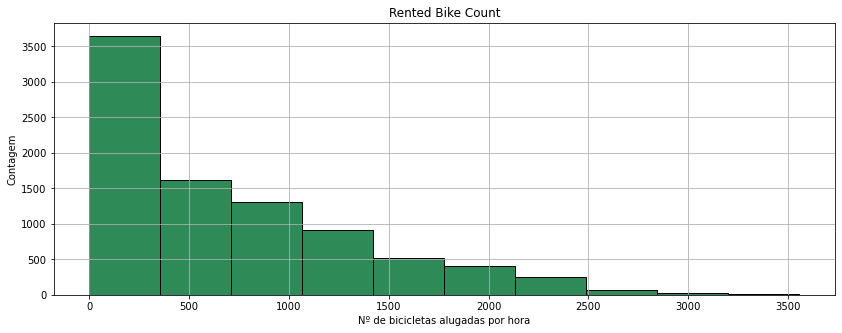

In [15]:
seoul_bikes.hist('Rented Bike Count', figsize=(14,5),color='seagreen',edgecolor='k')
plt.xlabel('Nº de bicicletas alugadas por hora')
plt.ylabel('Contagem')

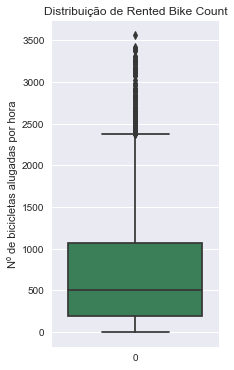

In [16]:
plt.figure(figsize=(3,6))
plt.style.use('seaborn')
sns.boxplot(data=seoul_bikes['Rented Bike Count'],color='seagreen')
plt.title('Distribuição de Rented Bike Count')
plt.ylabel('Nº de bicicletas alugadas por hora')
plt.show()

Por observação gráfica conclui-se que a maioria do número de bicicletas alugadas por hora se encontra entre 0 e aproximadamente 1000. São poucas as horas em que o número de bicicletas alugadas por hora supera este (1000). 
Existem ainda alguns valores extremos, quando o número de bicicletas alugadas por hora ultrapassa aproximadamente os 2500.

### Visualização das variáveis

In [17]:
def PlotBarCharts(inpData, colsToPlot):
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Gráfico de barras de: '+ str(colsToPlot))
    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber],color=sns.cubehelix_palette(n_colors=10,start=2, rot=0, dark=0, light=.95, reverse=True).as_hex()[2:7])

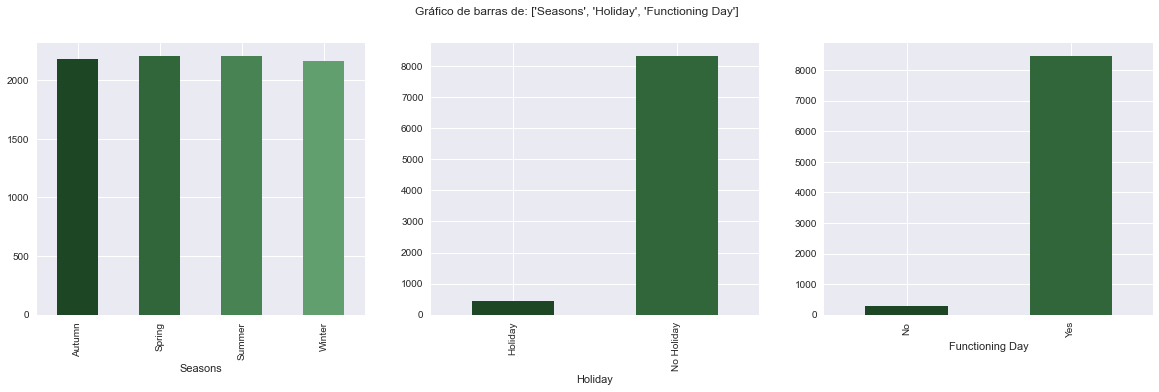

In [18]:
PlotBarCharts(inpData=seoul_bikes, colsToPlot=['Seasons', 'Holiday', 'Functioning Day'])

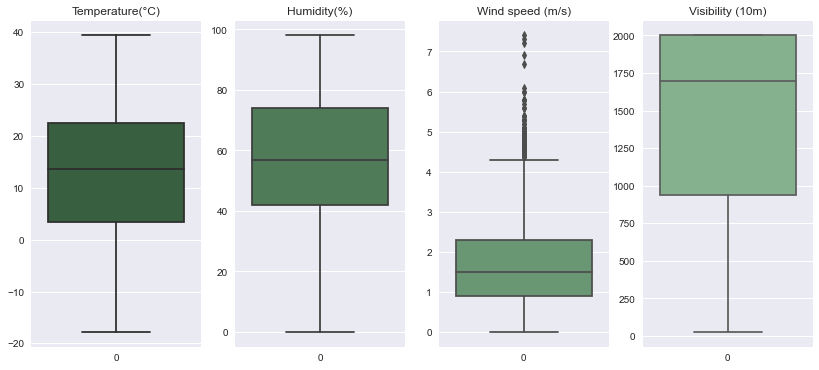

In [19]:
names = ['Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)']
nrows=1
ncols=4
fig, axes = plt.subplots(nrows,ncols,figsize=(14,6))


# Iterar pelos axes e names
i=3
for name, ax in zip(names, axes.flatten()):
    sns.boxplot(data=seoul_bikes[name],color=sns.cubehelix_palette(n_colors=10,start=2, rot=0, dark=0, light=.95, reverse=True).as_hex()[i], orient='v', ax=ax)
    ax.title.set_text(names[i-3])
    i = i+1
    

Por visualização gráfica, percebe-se que a variável Wind Speed apresenta um elevado número de outliers severos. As restantes variáveis não apresentam outliers.

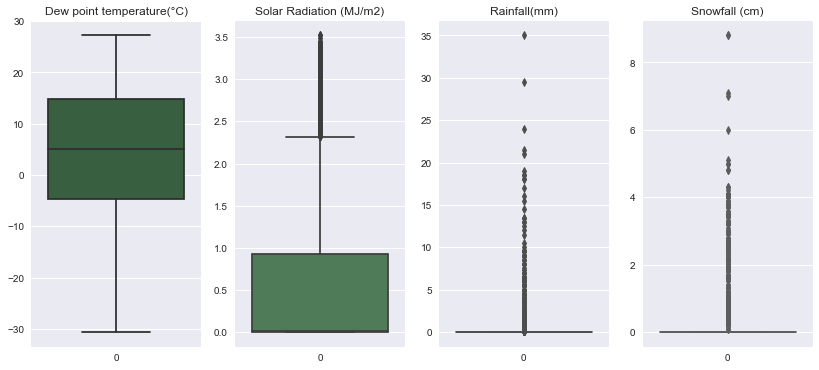

In [20]:
names = ['Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']
nrows=1
ncols=4
fig, axes = plt.subplots(nrows,ncols,figsize=(14,6))

# Iterar pelos axes e names
i=3
for name, ax in zip(names, axes.flatten()):
    sns.boxplot(data=seoul_bikes[name],color=sns.cubehelix_palette(n_colors=10,start=2, rot=0, dark=0, light=.95, reverse=True).as_hex()[i], orient='v', ax=ax)
    ax.title.set_text(names[i-3])
    i=i+1

Todas as variáveis à exceção de Dew Point Temperature apresentam outliers superiores. As variáveis Rainfall e Snowfall apresentam maior concentração de observações com valor nulo.

### Outliers

In [21]:
# Encontrar outliers superiores na variável Rainfall
interq = seoul_bikes['Rainfall(mm)'].quantile(0.75)- seoul_bikes['Rainfall(mm)'].quantile(0.25)
seoul_bikes['Rainfall(mm)'].quantile(0.75) + (1.5*(interq))

0.0

In [22]:
seoul_bikes['Rainfall(mm)'][seoul_bikes['Rainfall(mm)']>0].count()

528

Conclui-se que existem 528 outliers severos na variável Rainfall(mm). Qualquer valor superior a 0 é considerado um outlier severo.

In [23]:
seoul_bikes[seoul_bikes['Rainfall(mm)']>0].groupby('Seasons')['Rainfall(mm)'].count()

Seasons
Autumn     99
Spring    191
Summer    197
Winter     41
Name: Rainfall(mm), dtype: int64

In [24]:
# Encontrar outliers superiores na variável Snowfall
interq = seoul_bikes['Snowfall (cm)'].quantile(0.75)- seoul_bikes['Snowfall (cm)'].quantile(0.25)
seoul_bikes['Snowfall (cm)'].quantile(0.75) + (1.5*(interq))

0.0

In [25]:
seoul_bikes[seoul_bikes['Snowfall (cm)']>0].groupby('Seasons')['Snowfall (cm)'].count()

Seasons
Autumn     51
Winter    392
Name: Snowfall (cm), dtype: int64

In [26]:
seoul_bikes['Snowfall (cm)'][seoul_bikes['Snowfall (cm)']>0].count()

443

Conclui-se que existem 443 outliers severos na variável Snowfall(cm). Qualquer valor superior a 0 é considerado um outlier severo.

In [27]:
# Encontrar outliers superiores na variável Wind Speed
interq = seoul_bikes['Wind speed (m/s)'].quantile(0.75)- seoul_bikes['Wind speed (m/s)'].quantile(0.25)
seoul_bikes['Wind speed (m/s)'].quantile(0.75) + (1.5*(interq))

4.3999999999999995

In [28]:
seoul_bikes['Wind speed (m/s)'][seoul_bikes['Wind speed (m/s)']>4.399].count()

161

In [29]:
# Encontrar outliers superiores na variável Rented Bike Count
interq = seoul_bikes['Rented Bike Count'].quantile(0.75)- seoul_bikes['Rented Bike Count'].quantile(0.25)
seoul_bikes['Rented Bike Count'].quantile(0.75) + (1.5*(interq))

2376.625

In [30]:
seoul_bikes['Rented Bike Count'][seoul_bikes['Rented Bike Count']>2376.625].count()

158

Como podemos observar, existem bastantes outliers nas variáveis numéricas do dataset. Optou-se por manter os mesmos para garantir uma previsão mais robusta uma vez que se consideraram relevantes para a análise, como por exemplo, a elevada quantidade de chuva ou neve ser mais frequente numa certa estação do ano e portanto influenciar o número de bicicletas alugadas por hora. Posteriormente proceder-se-á à estandardização das variáveis para que estas estejam todas na mesma escala quando aplicado o modelo de regressão.

In [31]:
seoul_bikes.groupby('Seasons').mean()[['Rainfall(mm)','Snowfall (cm)']]

,Rainfall(mm),Snowfall (cm)
Seasons,,
Autumn,0.122756,0.056319
Spring,0.182880,0.000000
Summer,0.253487,0.000000
Winter,0.032824,0.247500


Conseguimos perceber que os níveis de precipitação se verificam ao longo do ano inteiro, destancando-se no Verão (na Coreia do Sul chove bastante no Verão, mais do que no Inverno). Em relação à neve, apenas neva no Inverno e um pouco no Outono.



### Visualização entre variáveis (bivariadas)

In [32]:
table1 = seoul_bikes.groupby('Seasons')['Rented Bike Count'].sum()
table1

Seasons
Autumn    1790002
Spring    1611909
Summer    2283234
Winter     487169
Name: Rented Bike Count, dtype: int64

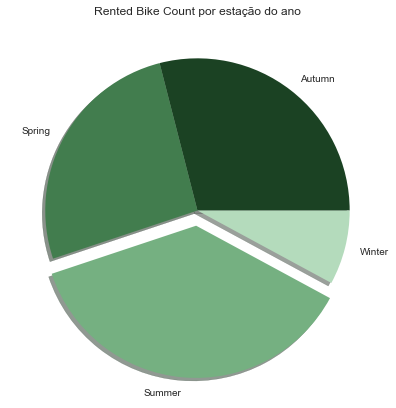

In [33]:
seasons = table1.index
  
data = table1.values

explode = (0.0, 0.0, 0.1, 0.0)
  
# Creating color parameters
colors = sns.cubehelix_palette(n_colors=20,start=2, rot=0, dark=0, light=.95, reverse=True).as_hex()[4:19:4]
  
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = seasons,explode=explode,colors=colors,shadow=True)
  
# show plot
plt.title('Rented Bike Count por estação do ano')
plt.show()

O mês com maior número de aluguer de bicicletas por hora é o Verão, seguido do Outono.

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

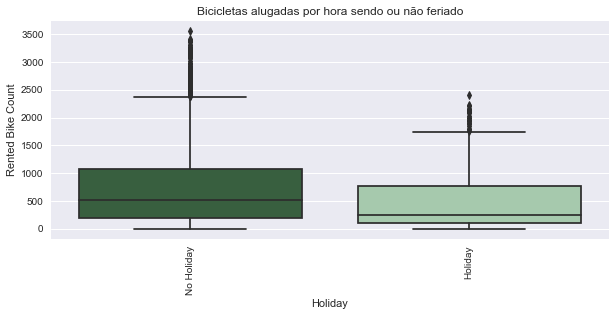

In [34]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Holiday',y='Rented Bike Count',data=seoul_bikes,palette=sns.cubehelix_palette(n_colors=10,start=2, rot=0, dark=0, light=.95, reverse=True).as_hex()[3:10:4])
plt.title('Bicicletas alugadas por hora sendo ou não feriado')
plt.xticks(rotation=90)

O número de bicicletas alugadas por hora é maior em dias que não são feriados nacionais.

Text(0.5, 1.0, 'Número médio de bicicletas alugadas diariamente desde Dez. 2017 até Nov. 2018')

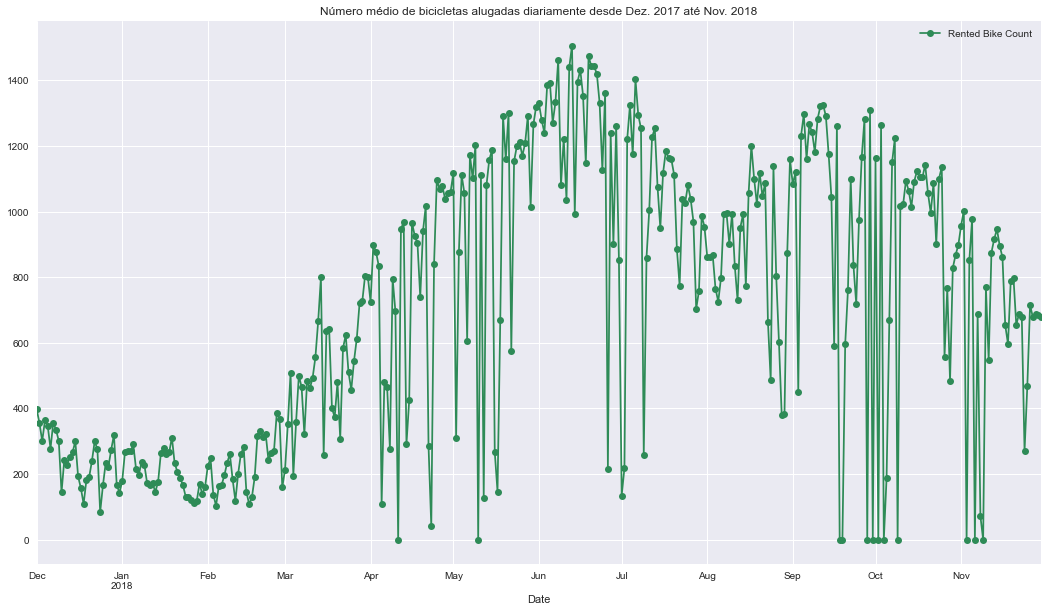

In [35]:
data22 = seoul_bikes[["Date","Rented Bike Count"]]
data22=data22.set_index("Date")

data22.resample('D').mean().plot(style="-o", figsize=(18, 10),color='seagreen')
plt.title('Número médio de bicicletas alugadas diariamente desde Dez. 2017 até Nov. 2018')

O gráfico representa o número médio de bicicletas alugadas por dia desde dezembro de 2017 até novembro de 2018. Mais uma vez percebe-se que o maior número de alugueres de bicicletas acontece entre junho e agosto, também sendo alto em setembro e outubro.

In [36]:
data_new2 = seoul_bikes[["Hour","Rented Bike Count","Functioning Day","Seasons"]]
data_new2 = data_new2.groupby(["Seasons","Hour"])["Rented Bike Count"].sum()
data_new2 = data_new2.reset_index()
data_new2

,Seasons,Hour,Rented Bike Count
0,Autumn,0,56755
1,Autumn,1,44200
2,Autumn,2,30198
3,Autumn,3,20524
4,Autumn,4,13522
...,...,...,...
91,Winter,19,27363
92,Winter,20,21891
93,Winter,21,21645
94,Winter,22,20262


In [37]:
data_new2 = data_new2.pivot(index="Hour",columns="Seasons", values="Rented Bike Count")

In [38]:
data_new2

Seasons,Autumn,Spring,Summer,Winter
Hour,,,,
0,56755,43298,82714,14866
1,44200,32755,64287,14315
2,30198,22767,46529,10601
3,20524,15163,31526,7003
4,13522,9740,20591,4543
5,13073,10456,22626,4610
6,28759,23151,44697,8354
7,63899,55376,83056,18861
8,108948,93274,130511,37998


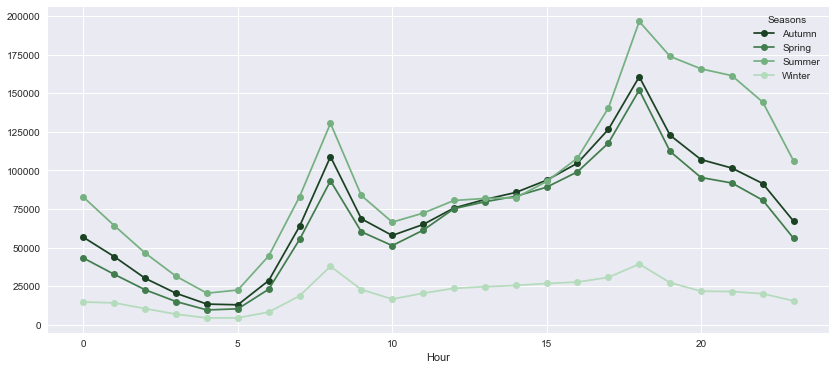

In [39]:
data_new2.plot(style="-o", figsize=(14, 6),color=sns.cubehelix_palette(n_colors=20,start=2, rot=0, dark=0, light=.95, reverse=True).as_hex()[4:20:4]);

No gráfico observa-se uma tendência comum a todas as estações do ano. Ao longo do dia são atingidos picos de alugueres de bicicletas, um durante a manhã pelas 8h e outro no fim do dia pelas 18h, conhecidas como as horas de maior afluência de pessoas que vão e voltam do trabalho.

Text(0.5, 1.0, 'Número médio de radiação solar diária desde Dez. 2017 até Nov. 2018')

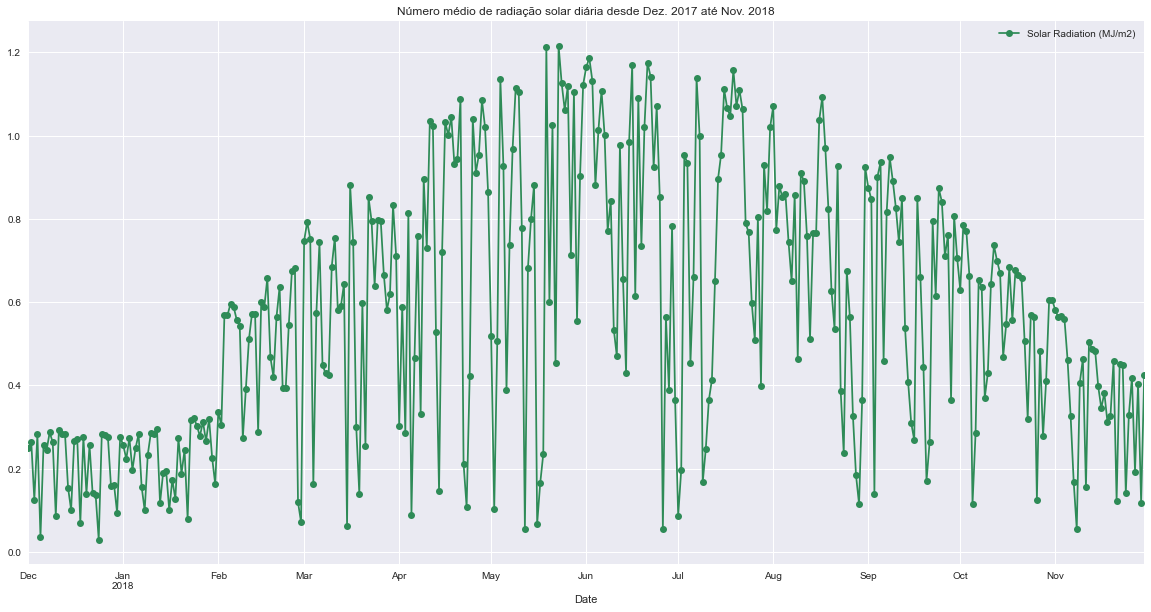

In [40]:
data3 = seoul_bikes[["Date","Solar Radiation (MJ/m2)"]]
data3=data3.set_index("Date")

data3.resample('D').mean().plot(style="-o", figsize=(20, 10),color='seagreen')
plt.title('Número médio de radiação solar diária desde Dez. 2017 até Nov. 2018')

O gráfico sugere uma distribuição aparentemente normal dos dados para a variável Solar Radiation em que esta atinge o seu pico durante o mês de junho e é maior, como seria expectável, nos meses do Verão.

Text(0.5, 1.0, 'Wind speed (m/s)')

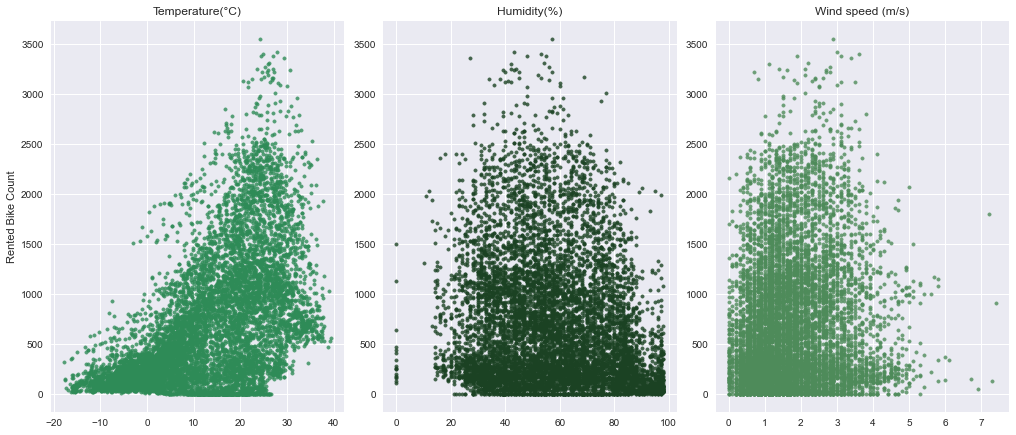

In [41]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,figsize=(14,6))
fig.tight_layout()
ax1.scatter(seoul_bikes['Temperature(°C)'],seoul_bikes['Rented Bike Count'], c ='seagreen', marker ='.', alpha=0.8)
ax1.set_title('Temperature(°C)')
ax1.set_ylabel('Rented Bike Count')
ax2.scatter(seoul_bikes['Humidity(%)'],seoul_bikes['Rented Bike Count'], c =sns.cubehelix_palette(n_colors=20,start=2, rot=0, dark=0, light=.95, reverse=True).as_hex()[4], marker ='.', alpha=0.8)
ax2.set_title('Humidity(%)')
ax3.scatter(seoul_bikes['Wind speed (m/s)'],seoul_bikes['Rented Bike Count'], c =sns.cubehelix_palette(n_colors=20,start=2, rot=0, dark=0, light=.95, reverse=True).as_hex()[9], marker ='.', alpha=0.8)
ax3.set_title('Wind speed (m/s)')

### Correlação entre variáveis

In [42]:
# Matriz de Correlação entre as variáveis
corr_mat = seoul_bikes.corr()
corr_mat

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(°C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


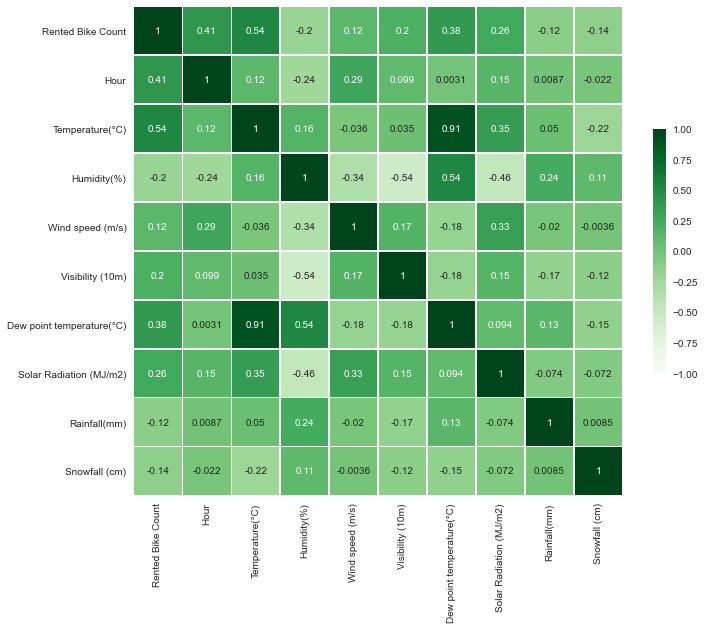

In [43]:
# Ajustar o tamanho da figura
f, ax = plt.subplots(figsize=(11, 9))

# Matriz de correlação
sns.heatmap(corr_mat, cmap="Greens", vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

Por observação quer da matriz de correlações, quer do corrplot consegue-se perceber que a variável mais correlacionada com a target Rented Bike Count é a Temperature, seguida da Hour e da Dew Point Temperature. Destaca-se também a existência de multicolineariedade entre as variáveis Temperature e Dew Point Temperature (correlação de 0.91). As variáveis Humidity, Rainfall e Snowfall estão relacionadas com a target no sentido negativo ou seja quando aumenta uma unidade seja na Humidade, na queda de chuva ou de neve, os alugueres de bicicletas tendem a reduzir.

#### Variáveis categóricas e a target - Análise de Variância

In [44]:
# Análise de variância entre Seasons, Holiday, Functioning Day e a variável target Rented Bike Count
import warnings
warnings.filterwarnings("ignore")

anova_seoul = pg.anova(data=seoul_bikes, dv='Rented Bike Count', between=['Seasons', 'Holiday', 'Functioning Day'], effsize='n2')
# ETA - Rented Bike Count x Seasons
eta_seasons = anova_seoul.loc[anova_seoul['Source'] == 'Seasons', 'n2'].values[0]
print(eta_seasons)

3.3001994990388265e-14


C:\Users\lurdi\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


In [45]:
# ETA - Rented Bike Count x Holiday
eta_holiday = anova_seoul.loc[anova_seoul['Source'] == 'Holiday', 'n2'].values[0]
print(eta_holiday)

-1.4014043532932137e-15


In [46]:
# ETA - Rented Bike Count x Functioning Day
eta_funcday = anova_seoul.loc[anova_seoul['Source'] == 'Functioning Day', 'n2'].values[0]
print(eta_funcday)

1.1139359025810509e-13


Os valores das correlações entre as variáveis categóricas e a target **Rented Bike Count** são todos valores praticamente não significativos, muito próximos de 0, podendo não ser de grande importância para o modelo.

### Data Preparation

In [47]:
seoul_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [48]:
# Atribuição da classificação 'No Rain','Light', 'Moderate' e 'Heavy' aos valores de Rainfall(mm) que se encontram nos seguintes limites [0 - 2.5], [2.6 - 10], [11 - 35] respetivamente.
seoul_bikes['Rainfall_scale'] = pd.cut(seoul_bikes['Rainfall(mm)'],bins=[-1,0,2.5,10.,35.],labels=['No Rain','Light','Moderate','Heavy'])

In [49]:
# Atribuição da classificação 'No', caso não tenha nevado (valores nulos de Snowfall (cm)), e 'Yes', caso tenha nevado (valores de Snowfall (cm) superiores a 0)
seoul_bikes['Snowfall_scale'] = pd.cut(seoul_bikes['Snowfall (cm)'],bins=[-1,0,1000],labels=["No","Yes"])

A escala foi então construída. 

In [50]:
seoul_bikes['Rainfall_scale']

0       No Rain
1       No Rain
2       No Rain
3       No Rain
4       No Rain
         ...   
8755    No Rain
8756    No Rain
8757    No Rain
8758    No Rain
8759    No Rain
Name: Rainfall_scale, Length: 8760, dtype: category
Categories (4, object): ['No Rain' < 'Light' < 'Moderate' < 'Heavy']

In [51]:
# Conversão das variáveis em dummy, removendo a primeira para evitar a existência de multicolineariedade no modelo.
seoul_bikes_dummy=pd.get_dummies(seoul_bikes, drop_first="True", dtype=np.int64)

In [52]:
seoul_bikes_dummy.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Rainfall_scale_Light,Rainfall_scale_Moderate,Rainfall_scale_Heavy,Snowfall_scale_Yes
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,0.252055,0.252055,0.246575,0.950685,0.966324,0.045776,0.011986,0.002511,0.050571
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,0.434217,0.434217,0.431042,0.216537,0.180404,0.209011,0.108830,0.050054,0.219132
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
seoul_para_final = seoul_bikes_dummy.drop(['Date', 'Dew point temperature(°C)'],axis=1)

In [54]:
# Remoção da variável 'Dew point temperature (°C)' pois encontra-se altamente correlacionada com a variável 'Temperature(°C)' evitando-se então casos de multicolinearidade.
seoul_bikes_dummy = seoul_bikes_dummy.drop(['Date', 'Dew point temperature(°C)','Functioning Day_Yes'],axis=1)
seoul_bikes_dummy=seoul_bikes_dummy.drop(seoul_bikes_dummy.index[seoul_bikes['Rented Bike Count'] == 0])

In [55]:
seoul_bikes_dummy2 = seoul_bikes_dummy.copy()

### Estandardização

In [56]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
#
# Hour, Temperature(°C) e Solar Radiation (MJ/m2) (maior corr)
wanted_cols = ['Hour', 'Temperature(°C)', 'Solar Radiation (MJ/m2)',"Humidity(%)",'Wind speed (m/s)',"Visibility (10m)",'Rainfall(mm)','Snowfall (cm)']
df_fit = seoul_bikes_dummy2

#
df_fit[wanted_cols] = scale.fit_transform(df_fit[wanted_cols])

In [57]:
df_fit.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Rainfall_scale_Light,Rainfall_scale_Moderate,Rainfall_scale_Heavy,Snowfall_scale_Yes
0,254,-1.662748,-1.484762,-1.032395,0.458429,0.929577,-0.654079,-0.132495,-0.174951,0,0,1,1,0,0,0,0
1,204,-1.518249,-1.509548,-0.983575,-0.895248,0.929577,-0.654079,-0.132495,-0.174951,0,0,1,1,0,0,0,0
2,173,-1.373751,-1.550858,-0.934756,-0.701865,0.929577,-0.654079,-0.132495,-0.174951,0,0,1,1,0,0,0,0
3,107,-1.229252,-1.567382,-0.885937,-0.798556,0.929577,-0.654079,-0.132495,-0.174951,0,0,1,1,0,0,0,0
4,78,-1.084754,-1.550858,-1.081214,0.555121,0.929577,-0.654079,-0.132495,-0.174951,0,0,1,1,0,0,0,0


### Conjunto de treino, teste e validação

In [58]:
from sklearn.model_selection import train_test_split
#
X=df_fit.drop(["Rented Bike Count",'Rainfall(mm)','Snowfall (cm)'],axis=1)
y=seoul_bikes_dummy2['Rented Bike Count'] # Target

In [59]:
# Conjunto de treino - 80%
# Conjunto de teste - 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=10)

In [60]:
# Dimensões dos conjuntos de treino e teste
X_train.shape,  X_test.shape

((6772, 14), (1693, 14))

### Regressão Linear Modelo 1 Estandardizado- com Rainfall e Snowfall em escala

In [61]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
model=regr.fit(X_train, y_train)
pred_train=model.predict(X_train)
pred_test=model.predict(X_test)

In [62]:
print('Linear model intercept: {} \nModel coefficients: {}'
     .format(model.intercept_,model.coef_))

Linear model intercept: 823.4194122426247 
Model coefficients: [ 204.07671396  324.118467   -132.06034721   24.00272526    7.39333651
  -70.79102395 -129.82041858 -150.34829226 -377.04833623   98.34741942
 -495.73902032 -571.91458007 -781.6808537   119.2217712 ]


In [63]:
# Coeficientes associados a cada uma das variáveis
df_coef_linreg = pd.DataFrame({"var": X_train.columns.values, 
                              "coef":model.coef_})
df_coef_linreg

,var,coef
0,Hour,204.076714
1,Temperature(°C),324.118467
2,Humidity(%),-132.060347
3,Wind speed (m/s),24.002725
4,Visibility (10m),7.393337
5,Solar Radiation (MJ/m2),-70.791024
6,Seasons_Spring,-129.820419
7,Seasons_Summer,-150.348292
8,Seasons_Winter,-377.048336
9,Holiday_No Holiday,98.347419


##### RMSE

In [64]:
from sklearn import metrics
metrics.mean_squared_error(y_pred=pred_test, y_true=y_test, squared=False)

437.6175830613012

##### R^2

In [65]:
metrics.r2_score(y_pred=pred_test, y_true=y_test)

0.5570706184172498

### Regressão linear LASSO - Modelo 2 Estandardizado- com Rainfall e Snowfall em escala

In [66]:
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

lasso = linear_model.Lasso(alpha = 0.1)
model2=lasso.fit(X_train, y_train)
pred_test2=model2.predict(X_test)

In [67]:
df_coef_lasso_stand = pd.DataFrame({"var": X_train.columns.values, 
                              "coef":model2.coef_})
df_coef_lasso_stand

,var,coef
0,Hour,204.011455
1,Temperature(°C),323.427618
2,Humidity(%),-132.274319
3,Wind speed (m/s),23.645030
4,Visibility (10m),7.644748
5,Solar Radiation (MJ/m2),-70.359870
6,Seasons_Spring,-128.213086
7,Seasons_Summer,-148.243183
8,Seasons_Winter,-375.557729
9,Holiday_No Holiday,96.051958


##### RMSE

In [68]:
metrics.mean_squared_error(y_pred=pred_test2, y_true=y_test, squared=False)

437.6415366962562

##### R^2

In [69]:
metrics.r2_score(y_pred=pred_test2, y_true=y_test)

0.5570221283222514

### Regressão Linear Modelo 3 Estandardizado- com Rainfall e Snowfall originais

In [70]:
from sklearn.model_selection import train_test_split
#
X=df_fit.drop(["Rented Bike Count","Rainfall_scale_Light","Rainfall_scale_Moderate","Rainfall_scale_Heavy","Snowfall_scale_Yes"],axis=1)
y=df_fit['Rented Bike Count'] # Target

In [71]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, train_size = 0.8, random_state=10)

In [72]:
X_train2.shape, X_test2.shape

((6772, 12), (1693, 12))

In [73]:
regr1 = LinearRegression()
model3=regr1.fit(X_train2, y_train2)
pred_train3=model3.predict(X_train2)
pred_test3=model3.predict(X_test2)

In [74]:
print('Linear model intercept: {} \nModel coefficients: {}'
     .format(model3.intercept_,model3.coef_))


Linear model intercept: 800.102534182619 
Model coefficients: [ 200.99664795  319.40559485 -167.58727594   19.9686987     9.57544875
  -73.13413266  -70.00778415   16.04104329 -143.75672626 -150.06474457
 -376.69112587   99.0939882 ]


In [75]:
# Coeficientes associados a cada uma das variáveis
df_coef_linreg_stand = pd.DataFrame({"var": X_train2.columns.values, 
                              "coef":model3.coef_})
df_coef_linreg_stand

,var,coef
0,Hour,200.996648
1,Temperature(°C),319.405595
2,Humidity(%),-167.587276
3,Wind speed (m/s),19.968699
4,Visibility (10m),9.575449
5,Solar Radiation (MJ/m2),-73.134133
6,Rainfall(mm),-70.007784
7,Snowfall (cm),16.041043
8,Seasons_Spring,-143.756726
9,Seasons_Summer,-150.064745


##### RMSE

In [76]:
metrics.mean_squared_error(y_pred=pred_test3, y_true=y_test2, squared=False)

447.19023960324733

##### R^2

In [77]:
metrics.r2_score(y_pred=pred_test3, y_true=y_test2)

0.5374809811550656

### Regressão linear LASSO - Modelo 4 Estandardizado- com Rainfall e Snowfall originais

In [78]:
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

lasso = linear_model.Lasso(alpha = 0.1)
model4=lasso.fit(X_train2, y_train2)
pred_test4=model4.predict(X_test2)

In [79]:
df_coef_lasso_4 = pd.DataFrame({"var": X_train2.columns.values, 
                              "coef":model4.coef_})
df_coef_lasso_4

,var,coef
0,Hour,201.046023
1,Temperature(°C),318.836386
2,Humidity(%),-167.230774
3,Wind speed (m/s),19.713103
4,Visibility (10m),9.723623
5,Solar Radiation (MJ/m2),-72.698514
6,Rainfall(mm),-69.938721
7,Snowfall (cm),15.879444
8,Seasons_Spring,-141.994178
9,Seasons_Summer,-147.917953


##### RMSE

In [80]:
metrics.mean_squared_error(y_pred=pred_test4, y_true=y_test2, squared=False)

447.21468322998385

##### R^2

In [81]:
metrics.r2_score(y_pred=pred_test4, y_true=y_test2)

0.5374304167632711

Uma vez que se observa que as variáveis em escala reduzem o erro de previsão e melhoram o R^2, optou-se pela sua manutenção no modelo. Optou-se também por tentar modelos com os dados não estandardizados, pois não se estavam a obter grandes resultados.

### Novo conjunto de treino, teste e validação não estandardizado

In [82]:
from sklearn.model_selection import train_test_split
#
X=seoul_bikes_dummy.drop(["Rented Bike Count",'Rainfall(mm)','Snowfall (cm)'], axis=1)
y=seoul_bikes_dummy['Rented Bike Count'] # Target

In [83]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, train_size = 0.8, random_state=10)

In [84]:
# volte sempre
X_train1.shape, X_test1.shape

((6772, 14), (1693, 14))

### Regressão linear - Modelo 1 não estandardizado

In [85]:
from sklearn.linear_model import LinearRegression
regr2 = LinearRegression()
model_1=regr2.fit(X_train1, y_train1)
pred_train_1=model_1.predict(X_train1)
pred_test_1=model_1.predict(X_test1)

In [86]:
print('Linear model intercept: {} \nModel coefficients: {}'
     .format(model_1.intercept_,model_1.coef_))


Linear model intercept: 505.8234671281246 
Model coefficients: [ 2.94887648e+01  2.67785506e+01 -6.44711684e+00  2.32085270e+01
  1.21398216e-02 -8.15382625e+01 -1.29820419e+02 -1.50348292e+02
 -3.77048336e+02  9.83474194e+01 -4.95739020e+02 -5.71914580e+02
 -7.81680854e+02  1.19221771e+02]


In [87]:
# Coeficientes associados a cada uma das variáveis
df_coef_linreg_nostand = pd.DataFrame({"var": X_train1.columns.values, 
                              "coef":model_1.coef_})
df_coef_linreg_nostand

,var,coef
0,Hour,29.488765
1,Temperature(°C),26.778551
2,Humidity(%),-6.447117
3,Wind speed (m/s),23.208527
4,Visibility (10m),0.012140
5,Solar Radiation (MJ/m2),-81.538263
6,Seasons_Spring,-129.820419
7,Seasons_Summer,-150.348292
8,Seasons_Winter,-377.048336
9,Holiday_No Holiday,98.347419


##### MAPE

In [88]:
np.mean(np.abs((y_test1 - pred_test_1) / y_test)) * 100

153.79114091785084

###### RMSE

In [89]:
from sklearn import metrics
metrics.mean_squared_error(y_pred=pred_test_1, y_true=y_test1, squared=False)

437.6175830613013

###### R^2

In [90]:
metrics.r2_score(y_pred=pred_test_1, y_true=y_test1)

0.5570706184172497

### Regressão linear LASSO - Modelo 2

In [91]:
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

lasso = linear_model.Lasso(alpha = 0.1)
model_2=lasso.fit(X_train1, y_train1)
pred_test_2=model_2.predict(X_test1)

In [92]:
df_coef_lasso_nostand = pd.DataFrame({"var": X_train1.columns.values, 
                              "coef":model_2.coef_})
df_coef_lasso_nostand

,var,coef
0,Hour,29.482721
1,Temperature(°C),26.759993
2,Humidity(%),-6.464341
3,Wind speed (m/s),22.822867
4,Visibility (10m),0.012680
5,Solar Radiation (MJ/m2),-81.203380
6,Seasons_Spring,-128.097444
7,Seasons_Summer,-148.645015
8,Seasons_Winter,-375.027550
9,Holiday_No Holiday,96.131021


##### MAPE

In [93]:
np.mean(np.abs((y_test1 - pred_test_2) / y_test1)) * 100

153.591243207675

##### RMSE

In [94]:
from sklearn import metrics
metrics.mean_squared_error(y_pred=pred_test_2, y_true=y_test1, squared=False)

437.63355186218524

##### R^2

In [95]:
model_2.score(X_train1,y_train1)

0.5640098873552148

### Regressão linear LASSO (Hiperparâmetros afinados com recurso a cross validation) - Modelo 3

In [96]:
# Cross Validation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# Modelo
model_3 = LassoCV(alphas=None, cv=cv, n_jobs=-1, normalize=True)
model_3.fit(X_train1, y_train1)

# Previsão sobre o conjunto de teste
pred_test_3 = model_3.predict(X_test1)

# summarize chosen configuration
print('alpha: %f' % model_3.alpha_)

alpha: 0.004345


In [97]:
df_coef_lassocv = pd.DataFrame({"var": X_train1.columns.values, 
                              "coef":model_3.coef_})
df_coef_lassocv

,var,coef
0,Hour,29.499923
1,Temperature(°C),26.589883
2,Humidity(%),-6.400243
3,Wind speed (m/s),22.579759
4,Visibility (10m),0.012525
5,Solar Radiation (MJ/m2),-79.783299
6,Seasons_Spring,-127.367230
7,Seasons_Summer,-146.009044
8,Seasons_Winter,-375.827037
9,Holiday_No Holiday,96.365123


##### MAPE

In [98]:
np.mean(np.abs((y_test1 - pred_test_3) / y_test1)) * 100

153.5580419077071

##### RMSE

In [99]:
metrics.mean_squared_error(y_pred=pred_test_3, y_true=y_test1, squared=False)

437.6469861546055

##### R^2

In [100]:
metrics.r2_score(y_pred=pred_test_3, y_true=y_test1)

0.5570110964421016

### Regressão linear Ridge (Hiperparametros afinados com recurso a cross validation) - Modelo 4

In [101]:
from sklearn.linear_model import RidgeCV
ridge_cv=RidgeCV(alphas=np.logspace(0, 5, 100), scoring='r2') # cross validation
model_4=ridge_cv.fit(X_train1, y_train1)

#ver o melhor alpha 
model_4.alpha_

pred_test_4=model_4.predict(X_test1)

In [102]:
df_coef_ridge = pd.DataFrame({"var": X_train1.columns.values, "coef":model_4.coef_})
df_coef_ridge

,var,coef
0,Hour,29.470198
1,Temperature(°C),26.798720
2,Humidity(%),-6.474109
3,Wind speed (m/s),23.028206
4,Visibility (10m),0.012445
5,Solar Radiation (MJ/m2),-81.571814
6,Seasons_Spring,-129.316451
7,Seasons_Summer,-150.198939
8,Seasons_Winter,-376.019533
9,Holiday_No Holiday,98.043953


##### MAPE

In [103]:
np.mean(np.abs((y_test1 - pred_test_4) / y_test1)) * 100

153.6286364170343

##### RMSE

In [104]:
metrics.mean_squared_error(y_pred=pred_test_4, y_true=y_test1, squared=False)

437.61864439651885

###### R^2

In [105]:
model_4.score(X_test1,y_test1)

0.5570684699792536

### Decision Tree Regressor - Modelo 5

In [106]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
regtree=DecisionTreeRegressor()
model_5 = regtree.fit(X_train1,y_train1)
pred_test_5 = model_5.predict(X_test1)

In [107]:
# Nível máximo da árvore (profundidade)
model_5.get_depth()

31

##### MAPE

In [108]:
np.mean(np.abs((y_test1 - pred_test_5) / y_test1)) * 100

61.24713371118868

##### RMSE

In [109]:
metrics.mean_squared_error(y_pred=pred_test_5, y_true=y_test1, squared=False)

314.86100309491337

###### R^2

In [110]:
metrics.r2_score(y_test1,pred_test_5)

0.7707112677855925

### Extra Tree Regressor - Modelo 6

In [111]:
from sklearn.ensemble import ExtraTreesRegressor
feat_reg= ExtraTreesRegressor()
model_6=feat_reg.fit(X_train1,y_train1)
pred_test_6 = model_6.predict(X_test1)

In [112]:
feat_reg.feature_importances_

array([0.34134909, 0.20258838, 0.09151488, 0.02475421, 0.02774193,
       0.0725715 , 0.01532357, 0.01269519, 0.15230302, 0.00607002,
       0.04218967, 0.00713333, 0.00226106, 0.00150414])

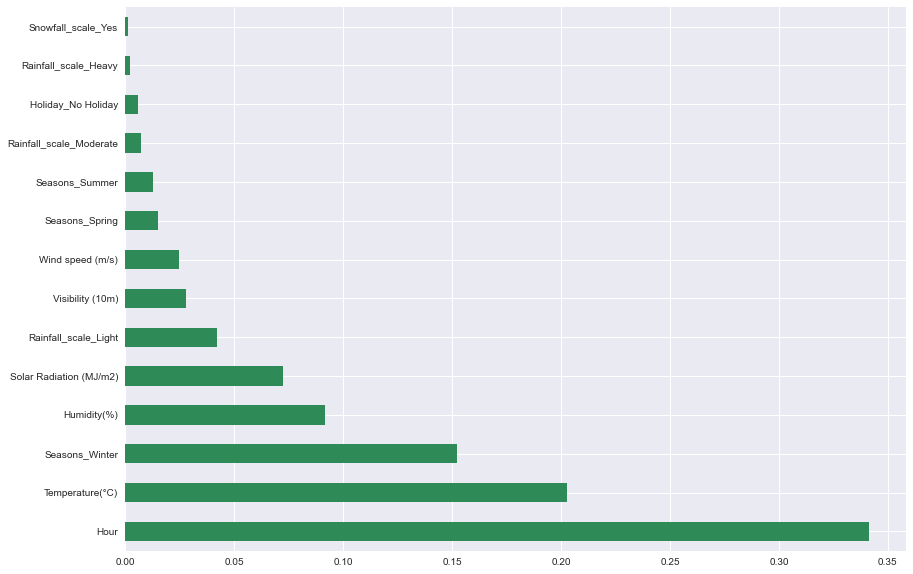

In [113]:
feat_importances = pd.Series(feat_reg.feature_importances_, index=X_train.columns)
fig, axe = plt.subplots(figsize=(14, 10))
feat_importances.nlargest(20).plot(kind='barh', ax=axe,color='seagreen')
plt.show()

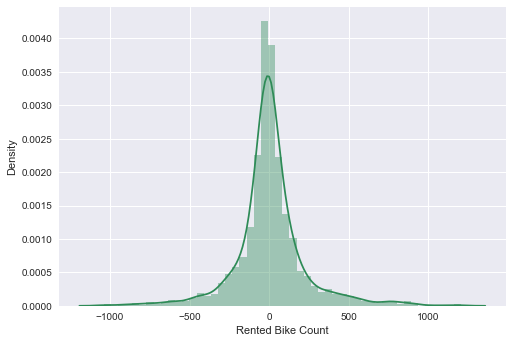

In [114]:
prediction=feat_reg.predict(X_test1)
# checking difference between labled y and predicted y
sns.distplot(y_test1-prediction, color='seagreen')

##### MAPE

In [115]:
np.mean(np.abs((y_test1 - pred_test_6) / y_test1)) * 100

46.546185271759036

##### RMSE

In [116]:
metrics.mean_squared_error(y_pred=pred_test_6, y_true=y_test1, squared=False)

223.69009782080943

##### R^2

In [117]:
metrics.r2_score(y_test1,pred_test_6)

0.884271990751001

### Random Forest Regressor - Modelo 7

In [118]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(max_depth=25)
rf.fit(X_train1,y_train1)
prediction=rf.predict(X_test1)

##### MAPE

In [119]:
np.mean(np.abs((y_test1 - prediction) / y_test1)) * 100

57.41241092475961

##### RMSE

In [120]:
metrics.mean_squared_error(y_pred=prediction, y_true=y_test1, squared=False)

234.6851904313628

##### R^2

In [121]:
metrics.r2_score(y_test1,prediction)

0.8726155744008861

### Modelo 8: Logaritmização de Rented Bike Count

In [122]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
model8=regr.fit(X_train1, np.log(y_train1))
pred_train=model8.predict(X_train1)
pred_test8=np.exp(model8.predict(X_test1))

In [123]:
print('Linear model intercept: {} \nModel coefficients: {}'
     .format(model.intercept_,model.coef_))


Linear model intercept: 823.4194122426247 
Model coefficients: [ 204.07671396  324.118467   -132.06034721   24.00272526    7.39333651
  -70.79102395 -129.82041858 -150.34829226 -377.04833623   98.34741942
 -495.73902032 -571.91458007 -781.6808537   119.2217712 ]


In [124]:
# Coeficientes associados a cada uma das variáveis
df_coef_linreg_log = pd.DataFrame({"var": X_train1.columns.values, 
                              "coef":model8.coef_})
df_coef_linreg_log

,var,coef
0,Hour,0.045422
1,Temperature(°C),0.040964
2,Humidity(%),-0.011852
3,Wind speed (m/s),-0.001891
4,Visibility (10m),-0.000013
5,Solar Radiation (MJ/m2),-0.019548
6,Seasons_Spring,-0.310494
7,Seasons_Summer,-0.261997
8,Seasons_Winter,-0.833549
9,Holiday_No Holiday,0.300068


##### RMSE

In [125]:
from sklearn import metrics
metrics.mean_squared_error(y_pred=pred_test8, y_true=y_test1, squared=False)

445.17003005316104

##### MAPE

In [126]:
np.mean(np.abs((y_test1 - pred_test8) / y_test1)) * 100

73.7511536959702

##### R^2

In [127]:
metrics.r2_score(y_test1,pred_test8)

0.5416504584139196

### Modelo 9- Extra Tree Logaritmizado

In [128]:
from sklearn.ensemble import ExtraTreesRegressor
feat_reg1= ExtraTreesRegressor()
model9=feat_reg1.fit(X_train1,np.log(y_train1))
pred_test9 = np.exp(model9.predict(X_test1))

In [129]:
X_train1.columns

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday',
       'Rainfall_scale_Light', 'Rainfall_scale_Moderate',
       'Rainfall_scale_Heavy', 'Snowfall_scale_Yes'],
      dtype='object')

Importância dos preditores

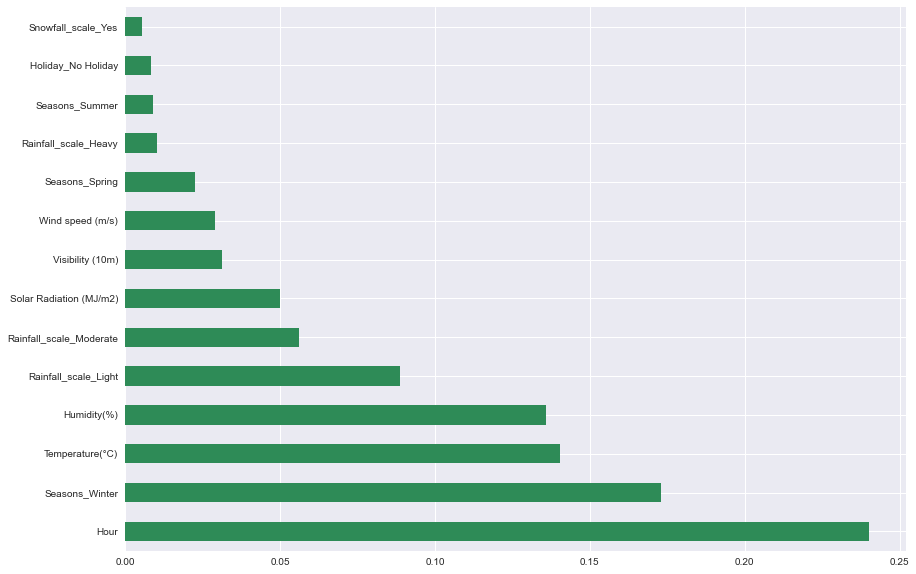

In [130]:
feat_importances1 = pd.Series(feat_reg1.feature_importances_, index=X_train.columns)
fig, axe = plt.subplots(figsize=(14, 10))
feat_importances1.nlargest(20).plot(kind='barh', ax=axe,color='seagreen')
plt.show()

##### MAPE

In [131]:
np.mean(np.abs((y_test1 - pred_test9) / y_test1)) * 100

31.7945330113079

##### RMSE

In [132]:
from sklearn import metrics
metrics.mean_squared_error(y_pred=pred_test9, y_true=y_test1, squared=False)

239.89654403383153

##### R^2

In [133]:
metrics.r2_score(y_test1,pred_test9)

0.8668954361574814

### Modelo 10: Random Forest Tree com target logaritmizada

In [134]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(max_depth=25)
rf.fit(X_train1,np.log(y_train1))
prediction1=np.exp(rf.predict(X_test1))

##### MAPE

In [135]:
np.mean(np.abs((y_test1 - prediction1) / y_test1)) * 100

35.43459703982556

##### RMSE

In [136]:
from sklearn import metrics
metrics.mean_squared_error(y_pred=prediction1, y_true=y_test1, squared=False)

246.17879842059065

##### R^2

In [137]:
metrics.r2_score(y_test1,prediction1)

0.8598328448969494

### Apresentação dos resultados

In [138]:
# resultados estandardizados
results_std = {'Modelos':['Regressão Linear standardized com escala','LASSO standardized com escala','Regressão Linear standardized com var. originais','LASSO standardized com var. originais'],'R^2':[metrics.r2_score(y_test,pred_test),metrics.r2_score(y_test,pred_test2),metrics.r2_score(y_test2,pred_test3),metrics.r2_score(y_test2,pred_test4)]}

In [139]:
results_std_df = pd.DataFrame(data=results_std)
results_std_df

,Modelos,R^2
0,Regressão Linear standardized com escala,0.557071
1,LASSO standardized com escala,0.557022
2,Regressão Linear standardized com var. originais,0.537481
3,LASSO standardized com var. originais,0.537430


In [140]:
results = {'Modelos':['Regressão Linear','LASSO','LASSO Afinado','Ridge','Decision Tree Regressor','Extra Tree Regressor','Random Forest Regressor',"Regressão Linear com Target Log","Extra Tree com Target Log","Random Forest Tree com Target Log"]
,'R^2':[metrics.r2_score(y_test1,pred_test_1),metrics.r2_score(y_test1,pred_test_2),metrics.r2_score(y_test1,pred_test_3),metrics.r2_score(y_test1,pred_test_4)
,metrics.r2_score(y_test1,pred_test_5),metrics.r2_score(y_test1,pred_test_6),metrics.r2_score(y_test1,prediction),metrics.r2_score(y_test1,pred_test8),metrics.r2_score(y_test1,pred_test9),metrics.r2_score(y_test1,prediction1)]
,'MAPE':[np.mean(np.abs((y_test1 - pred_test_1) / y_test1)) * 100,np.mean(np.abs((y_test1 - pred_test_2) / y_test1)) * 100,np.mean(np.abs((y_test1 - pred_test_3) / y_test1)) * 100,np.mean(np.abs((y_test1 - pred_test_4) / y_test1)) * 100
,np.mean(np.abs((y_test1- pred_test_5) / y_test1)) * 100,np.mean(np.abs((y_test1 - pred_test_6) / y_test1)) * 100,np.mean(np.abs((y_test1 - prediction) / y_test1)) * 100,np.mean(np.abs((y_test1 - pred_test8) / y_test1)) * 100
,np.mean(np.abs((y_test1 - pred_test9) / y_test1)) * 100,np.mean(np.abs((y_test1 - prediction1) / y_test1)) * 100],'RMSE':[metrics.mean_squared_error(y_pred=pred_test_1, y_true=y_test1, squared=False),metrics.mean_squared_error(y_pred=pred_test_2, y_true=y_test1, squared=False),metrics.mean_squared_error(y_pred=pred_test_3, y_true=y_test1, squared=False),metrics.mean_squared_error(y_pred=pred_test_4, y_true=y_test1, squared=False)
,metrics.mean_squared_error(y_pred=pred_test_5, y_true=y_test1, squared=False),metrics.mean_squared_error(y_pred=pred_test_6, y_true=y_test1, squared=False),metrics.mean_squared_error(y_pred=prediction, y_true=y_test1, squared=False),metrics.mean_squared_error(y_pred=pred_test8, y_true=y_test1, squared=False)
,metrics.mean_squared_error(y_pred=pred_test9, y_true=y_test1, squared=False),metrics.mean_squared_error(y_pred=prediction1, y_true=y_test1, squared=False)]}

In [141]:
results_df = pd.DataFrame(data=results)
results_df

,Modelos,R^2,MAPE,RMSE
0,Regressão Linear,0.557071,153.791141,437.617583
1,LASSO,0.557038,153.591243,437.633552
2,LASSO Afinado,0.557011,153.558042,437.646986
3,Ridge,0.557068,153.628636,437.618644
4,Decision Tree Regressor,0.770711,61.247134,314.861003
5,Extra Tree Regressor,0.884272,46.546185,223.690098
6,Random Forest Regressor,0.872616,57.412411,234.685190
7,Regressão Linear com Target Log,0.541650,73.751154,445.170030
8,Extra Tree com Target Log,0.866895,31.794533,239.896544
9,Random Forest Tree com Target Log,0.859833,35.434597,246.178798


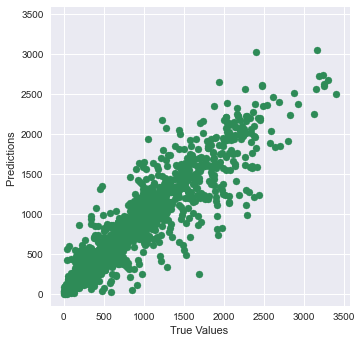

In [142]:
fig, ax = plt.subplots()
plt.scatter(y_test, pred_test9, color='seagreen')
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.axis('equal')
plt.axis('square')
plt.show()

In [143]:
seoul_bikes_prev = X_test
seoul_bikes_prev['Rented Bike Count'] = y_test
seoul_bikes_prev['prevs'] = pred_test9

In [144]:
seoul_bikes[seoul_bikes['Date']=='2018-08-26']

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rainfall_scale,Snowfall_scale
6432,2018-08-26,1163,0,22.8,78,1.5,2000,18.7,0.00,0.0,0.0,Summer,No Holiday,Yes,No Rain,No
6433,2018-08-26,769,1,22.5,80,0.6,2000,18.8,0.00,0.0,0.0,Summer,No Holiday,Yes,No Rain,No
6434,2018-08-26,600,2,22.1,84,0.6,2000,19.2,0.00,0.0,0.0,Summer,No Holiday,Yes,No Rain,No
6435,2018-08-26,426,3,21.6,85,0.1,1982,18.9,0.00,0.0,0.0,Summer,No Holiday,Yes,No Rain,No
6436,2018-08-26,290,4,21.2,86,0.5,1724,18.7,0.00,0.0,0.0,Summer,No Holiday,Yes,No Rain,No
6437,2018-08-26,188,5,20.7,88,0.6,1100,18.6,0.00,0.0,0.0,Summer,No Holiday,Yes,No Rain,No
6438,2018-08-26,243,6,20.4,88,0.6,1064,18.3,0.00,0.0,0.0,Summer,No Holiday,Yes,No Rain,No
6439,2018-08-26,381,7,20.7,85,0.5,1052,18.0,0.11,0.0,0.0,Summer,No Holiday,Yes,No Rain,No
6440,2018-08-26,566,8,22.1,74,1.0,1479,17.2,0.77,0.0,0.0,Summer,No Holiday,Yes,No Rain,No
6441,2018-08-26,725,9,24.2,64,1.2,1985,16.9,1.48,0.0,0.0,Summer,No Holiday,Yes,No Rain,No


### Modelação com nova variável binária de Eventos

Os eventos selecionados foram os seguintes por ordem cronológica:

* Seoul Comic Word: 3 e 4 de fevereiro de 2018
* Lunar New Year Fun: 17 de fevereiro de 2018
* Protesto em Seoul: 4 de maio de 2018
* Concerto Twice: 19 e 20 de maio 2018
* UltraKorea festival: 8, 9 e 10 de junho de 2018
* Dia de eleições em Seoul: 13 de junho de 2018
* Concerto EXO: 13, 14 e 15 de julho de 2018
* Korean Liberation Day: 15 de agosto de 2018
* Concerto IKON: 18 de agosto de 2018
* Concerto BTS: 25 e 26 de agosto de 2018
* Seoul International Fireworks Festival 2018: 6 de outubro de 2018
* Concerto Monsta X: 10 de outubro 2018
* Seoul Lantern Festival 2018: 2 a 18 de novembro de 2018
* Santa Run 2018: 8 de dezembro de 2018

In [145]:
data=pd.DataFrame(columns=["mes","dia","Media Bike"])
for a in range(1,12):
    for b in range(31):
        c=(sum(seoul_bikes.loc[seoul_bikes["Date"]==f"2018-{a}-{b}","Rented Bike Count"])/len(seoul_bikes.loc[seoul_bikes["Date"]=="2018-10-1","Rented Bike Count"]))
        data.loc[len(data.index)] = [a, b,c]
table = data.sort_values(by=["Media Bike"],ascending=False)
table.head(20)

,mes,dia,Media Bike
168,6.0,13.0,1506.208333
174,6.0,19.0,1472.875000
163,6.0,8.0,1462.625000
175,6.0,20.0,1443.291667
176,6.0,21.0,1442.541667
167,6.0,12.0,1439.333333
171,6.0,16.0,1431.666667
177,6.0,22.0,1419.958333
192,7.0,6.0,1403.166667
170,6.0,15.0,1395.500000


In [146]:
datas_eventos = ["2018-06-13","2018-05-04","2018-10-06","2018-11-02","2018-11-03","2018-11-04","2018-11-05","2018-11-06","2018-11-07","2018-11-08","2018-11-09","2018-11-10","2018-11-11","2018-11-12","2018-11-13","2018-11-14","2018-11-15","2018-11-16","2018-11-17","2018-11-18","2018-08-25","2018-08-26","2018-02-03","2018-02-04","2018-02-17","2018-12-08","2018-10-10","2018-05-19","2018-05-20","2018-07-13","2018-07-14","2018-07-15","2018-06-08","2018-06-09","2018-06-10","2018-08-15","2018-08-18"]

In [147]:
seoul_bikes_dummy["Events"]=0

In [148]:
for i in datas_eventos:
    seoul_bikes_dummy.loc[seoul_bikes["Date"]==i,"Events"]=1

In [149]:
seoul_bikes_dummy["Events"].nunique()

2

In [150]:
seoul_bikes_dummy.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Rainfall_scale_Light,Rainfall_scale_Moderate,Rainfall_scale_Heavy,Snowfall_scale_Yes,Events
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,1,1,0,0,0,0,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0,1,1,0,0,0,0,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,1,1,0,0,0,0,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,1,0,0,0,0,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,1,1,0,0,0,0,0


### Modelo de Regressão com a nova variável Events

In [151]:
from sklearn.model_selection import train_test_split
#
X=seoul_bikes_dummy.drop(["Rented Bike Count",'Rainfall(mm)','Snowfall (cm)'], axis=1)
y=seoul_bikes_dummy['Rented Bike Count'] # Target

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=10)

In [153]:
from sklearn.linear_model import LinearRegression
regr3 = LinearRegression()
model_11=regr3.fit(X_train, y_train)
pred_train_11=model_11.predict(X_train)
pred_test_11=model_11.predict(X_test)

In [154]:
print('Linear model intercept: {} \nModel coefficients: {}'
     .format(model_11.intercept_,model3.coef_))


Linear model intercept: 491.03956836604505 
Model coefficients: [ 200.99664795  319.40559485 -167.58727594   19.9686987     9.57544875
  -73.13413266  -70.00778415   16.04104329 -143.75672626 -150.06474457
 -376.69112587   99.0939882 ]


In [155]:
# Coeficientes associados a cada uma das variáveis
df_coef_linreg_events = pd.DataFrame({"var": X_train.columns.values, 
                              "coef":model_11.coef_})
df_coef_linreg_events

,var,coef
0,Hour,29.430134
1,Temperature(°C),27.100192
2,Humidity(%),-6.451282
3,Wind speed (m/s),22.910220
4,Visibility (10m),0.013180
5,Solar Radiation (MJ/m2),-82.200153
6,Seasons_Spring,-122.173840
7,Seasons_Summer,-151.147651
8,Seasons_Winter,-365.262873
9,Holiday_No Holiday,100.501879


##### MAPE

In [156]:
np.mean(np.abs((y_test - pred_test_11) / y_test)) * 100

154.57890651971942

##### RMSE

In [157]:
from sklearn import metrics
metrics.mean_squared_error(y_pred=pred_test_11, y_true=y_test, squared=False)

437.3045761250159

##### R^2

In [158]:
metrics.r2_score(y_pred=pred_test_11, y_true=y_test)

0.5577040042445723

### Extra Trees com nova variável Events

In [159]:
from sklearn.ensemble import ExtraTreesRegressor
feat_reg= ExtraTreesRegressor()
model_12=feat_reg.fit(X_train,y_train)
pred_test_12 = model_12.predict(X_test)

In [160]:
np.mean(np.abs((y_test - pred_test_12) / y_test)) * 100

44.69581313234941

In [161]:
metrics.r2_score(y_pred=pred_test_12, y_true=y_test)

0.8885881174833453

### Extra Trees com nova variável e target logaritmizada

In [162]:
from sklearn.ensemble import ExtraTreesRegressor
feat_reg2= ExtraTreesRegressor()
model13=feat_reg2.fit(X_train,np.log(y_train))
pred_test13 = np.exp(model13.predict(X_test))

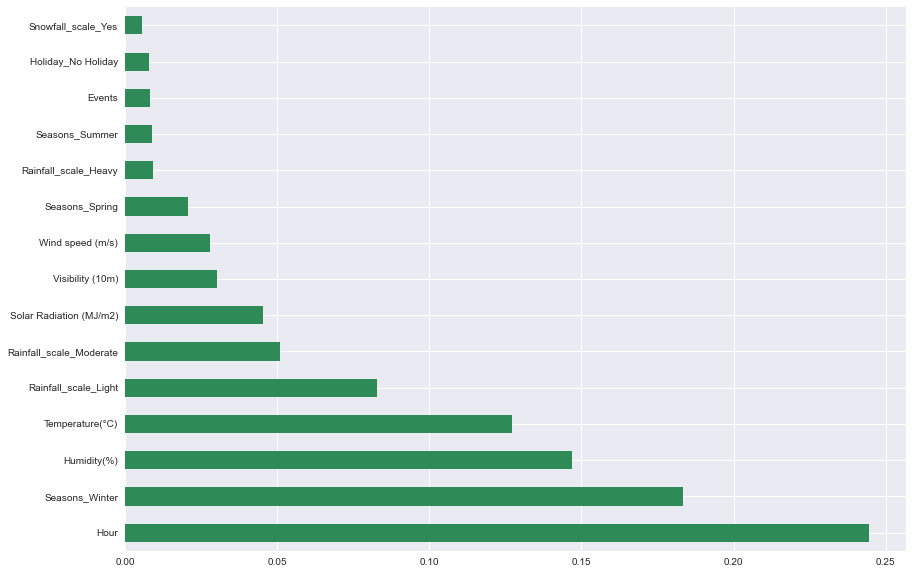

In [163]:
feat_importances = pd.Series(feat_reg2.feature_importances_, index=X_train.columns)
fig, axe = plt.subplots(figsize=(14, 10))
feat_importances.nlargest(20).plot(kind='barh', ax=axe,color='seagreen')
plt.show()

In [164]:
metrics.r2_score(y_pred=pred_test13, y_true=y_test)

0.8755052076609056

In [165]:
np.mean(np.abs((y_test - pred_test13) / y_test)) * 100

31.159663872225813

In [166]:
from sklearn.metrics import mean_absolute_error as mae
mae(y_test, pred_test13)

137.57489353770455

In [167]:
seoul_com_pred = X_test.copy()
seoul_com_pred["Pred_model13"] = pred_test13
seoul_com_pred.head(30)

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Rainfall_scale_Light,Rainfall_scale_Moderate,Rainfall_scale_Heavy,Snowfall_scale_Yes,Events,Pred_model13
5028,12,27.0,68,2.0,1863,1.30,0,1,0,1,0,0,0,0,0,938.276246
5121,9,21.0,97,1.3,825,0.14,0,1,0,1,0,1,0,0,0,18.898995
4191,15,23.5,36,3.2,1786,2.91,1,0,0,1,0,0,0,0,0,1406.774130
8498,2,2.6,46,1.5,1811,0.00,0,0,0,1,0,0,0,0,0,286.783871
8072,8,4.7,72,1.0,1306,0.12,0,0,0,1,0,0,0,0,1,1003.277767
3300,12,18.0,26,2.2,1459,3.03,1,0,0,1,0,0,0,0,0,994.359660
1461,21,-1.6,91,1.3,508,0.00,0,0,1,1,1,0,0,1,0,104.493033
1324,4,-15.9,37,2.4,1985,0.00,0,0,1,1,0,0,0,1,0,30.477915
8128,16,18.4,25,3.2,1909,1.05,0,0,0,1,0,0,0,0,1,1465.343305
16,16,1.2,54,4.2,793,0.24,0,0,1,1,0,0,0,0,0,310.848385


### Previsão em dias de não Functioning Day

<strong> O que é o seoul_para final??? </strong>

In [168]:
len(seoul_para_final[seoul_para_final["Rented Bike Count"]==0])

295

In [169]:
len(seoul_para_final[seoul_para_final["Functioning Day_Yes"]==0])

295

In [170]:
seoul_bikes[seoul_bikes["Functioning Day"]=="No"].groupby("Date").count()["Hour"]

Date
2018-04-11    24
2018-05-10    24
2018-09-18    24
2018-09-19    24
2018-09-28    24
2018-09-30    24
2018-10-02    24
2018-10-04    24
2018-10-06     7
2018-10-09    24
2018-11-03    24
2018-11-06    24
2018-11-09    24
Name: Hour, dtype: int64

In [171]:
seoul_nofuncday = seoul_para_final[seoul_para_final["Functioning Day_Yes"]==0]

In [172]:
seoul_nofuncday.shape

(295, 18)

In [173]:
seoul_nofuncday.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Rainfall_scale_Light,Rainfall_scale_Moderate,Rainfall_scale_Heavy,Snowfall_scale_Yes
3144,0,0,14.4,82,4.6,1041,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0
3145,0,1,13.6,81,3.6,886,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0
3146,0,2,12.7,80,3.9,885,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0
3147,0,3,11.6,81,3.1,687,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0
3148,0,4,10.2,83,3.5,554,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0


In [174]:
pred_test_nofuncday=np.exp(model8.predict(seoul_nofuncday.drop(["Rented Bike Count","Rainfall(mm)","Snowfall (cm)","Functioning Day_Yes"],axis=1)))

In [175]:
seoul_nofuncday["predicted"]= pred_test_nofuncday
seoul_nofuncday["predicted"]= round(seoul_nofuncday["predicted"])

In [176]:
seoul_nofuncday.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Rainfall_scale_Light,Rainfall_scale_Moderate,Rainfall_scale_Heavy,Snowfall_scale_Yes,predicted
3144,0,0,14.4,82,4.6,1041,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,250.0
3145,0,1,13.6,81,3.6,886,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,257.0
3146,0,2,12.7,80,3.9,885,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,263.0
3147,0,3,11.6,81,3.1,687,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,261.0
3148,0,4,10.2,83,3.5,554,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,252.0


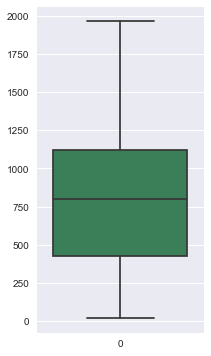

In [177]:
plt.figure(figsize=(3,6))
plt.style.use('seaborn')
sns.boxplot(data=pred_test_nofuncday,color='seagreen')
plt.show()

#### Representação visual do modelo da árvore de decisão

[Text(1674.0, 1467.72, 'Temperature(°C) <= 12.05\nmse = 407595.601\nsamples = 6772\nvalue = 727.163'),
 Text(837.0, 1141.56, 'Seasons_Winter <= 0.5\nmse = 119563.603\nsamples = 3164\nvalue = 371.96'),
 Text(418.5, 815.4000000000001, 'Hour <= 6.5\nmse = 179832.293\nsamples = 1453\nvalue = 544.918'),
 Text(209.25, 489.24, 'Hour <= 1.5\nmse = 31103.743\nsamples = 569\nvalue = 251.715'),
 Text(104.625, 163.08000000000015, '\n  (...)  \n'),
 Text(313.875, 163.08000000000015, '\n  (...)  \n'),
 Text(627.75, 489.24, 'Humidity(%) <= 86.5\nmse = 184612.232\nsamples = 884\nvalue = 733.643'),
 Text(523.125, 163.08000000000015, '\n  (...)  \n'),
 Text(732.375, 163.08000000000015, '\n  (...)  \n'),
 Text(1255.5, 815.4000000000001, 'Hour <= 6.5\nmse = 21405.674\nsamples = 1711\nvalue = 225.081'),
 Text(1046.25, 489.24, 'Hour <= 2.5\nmse = 3946.741\nsamples = 480\nvalue = 101.76'),
 Text(941.625, 163.08000000000015, '\n  (...)  \n'),
 Text(1150.875, 163.08000000000015, '\n  (...)  \n'),
 Text(1464.75

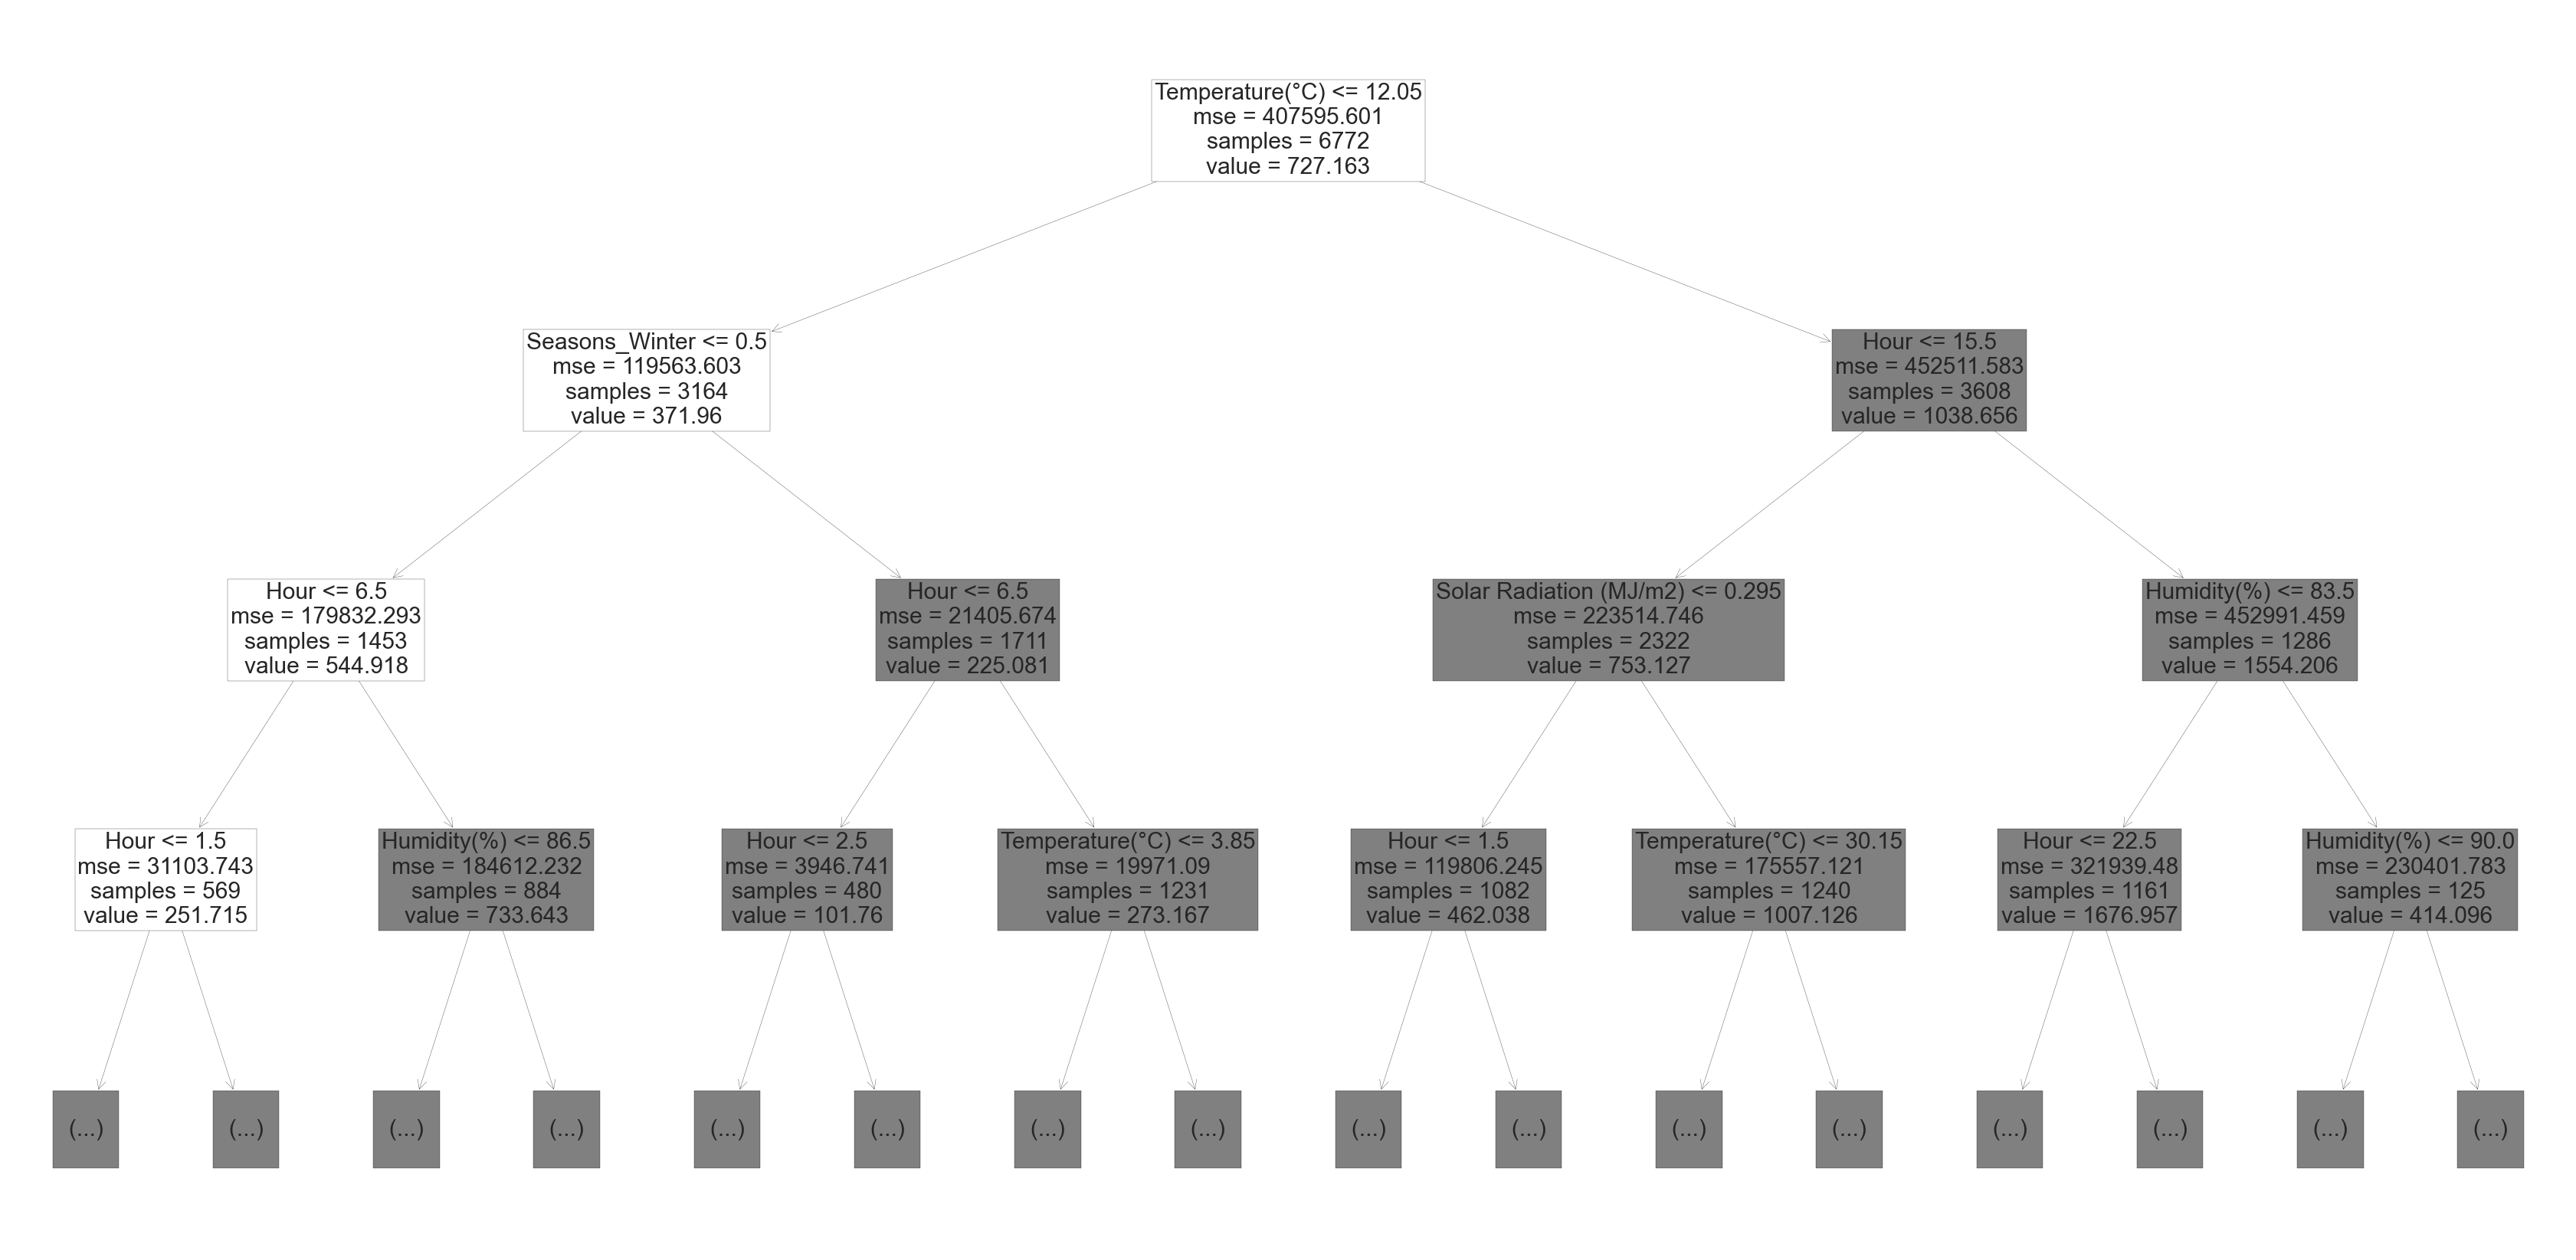

In [182]:
from sklearn import tree
fig = plt.figure(figsize=(60,30))
tree.plot_tree(model_5, feature_names=X_train.columns, fontsize=30, max_depth=3)

#### Exportação do melhor modelo 

In [180]:
import pickle 
pickle.dump(model13, open("model.pkl1",'wb'))
model=pickle.load(open("model.pkl1",'rb'))

In [181]:
print(np.exp(model.predict([[18,25,12,20,2000,68,0,1,0,0,1,1,0,0,1]])[0]))

686.9218487603681
